In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import scipy.stats as stats

In [8]:
def import_into_df(year_list):

    for yr in year_list:
        filepath = f'data/{yr}.tsv'
        df = pd.read_csv(filepath,sep='\t')
        df['SEASON'] = yr
        
        if yr == year_list[0]:
            out = df
        else:
            out = out.append(df, ignore_index=True)
    return out
    

In [19]:
years = list(range(2019,1995,-1))
nba = import_into_df(years)
nba

,TEAM,MATCH UP,GAME DATE,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-,SEASON
0,OKC,OKC @ LAC,08/14/2020,L,53,103,38,106,35.8,14,...,11,37,48,18,16,5,6,29,-4,2019
1,DEN,DEN @ TOR,08/14/2020,L,48,109,36,87,41.4,16,...,9,32,41,27,16,9,11,15,-8,2019
2,LAC,LAC vs. OKC,08/14/2020,W,53,107,34,85,40.0,12,...,12,49,61,23,23,10,2,22,4,2019
3,TOR,TOR vs. DEN,08/14/2020,W,48,117,45,90,50.0,18,...,13,38,51,27,19,8,5,24,8,2019
4,HOU,HOU vs. PHI,08/14/2020,L,48,96,35,80,43.8,12,...,1,26,27,25,17,10,9,18,-38,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56627,MIA,MIA vs. ATL,11/01/1996,W,48,94,35,78,44.9,10,...,13,27,40,26,19,8,4,25,13,1996
56628,VAN,VAN vs. POR,11/01/1996,L,48,85,34,77,44.2,5,...,9,18,27,23,16,7,5,21,-29,1996
56629,MIN,MIN vs. SAS,11/01/1996,W,48,82,31,74,41.9,3,...,9,27,36,18,18,6,12,13,4,1996
56630,HOU,HOU vs. SAC,11/01/1996,W,48,96,34,87,39.1,8,...,17,28,45,25,23,20,1,19,11,1996


In [23]:
nba.columns

Index(['TEAM', 'MATCH UP', 'GAME DATE', 'W/L', 'MIN', 'PTS', 'FGM', 'FGA',
       'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB',
       'AST', 'TOV', 'STL', 'BLK', 'PF', '+/-', 'SEASON'],
      dtype='object')

In [151]:
def scatter_win_lose(col1, col2, year_list, ax):
    df = nba[nba['SEASON'].isin(year_list)]
    win = df[df['W/L'] == 'W']
    lose = df[df['W/L'] == 'L']
    
    ax.scatter(lose[col1],lose[col2],label = 'Lose',alpha=0.5)
    ax.scatter(win[col1],win[col2],label = 'Win',alpha=0.5)
    
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.set_title(', '.join(map(str,year_list)))

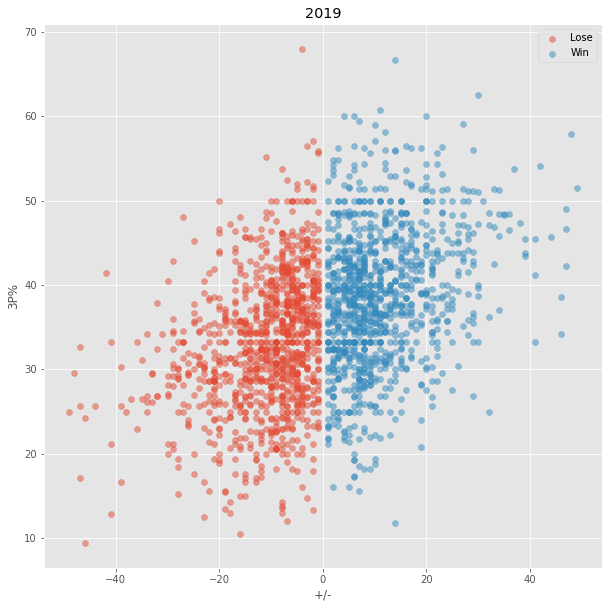

In [175]:
fig, ax = plt.subplots(figsize=(10,10))
scatter_win_lose('+/-','3P%',[2019],ax)
ax.legend()

In [138]:
def scatter_WL_subplots(col1,col2):
    years = list(range(1996,2020))
    fig, ax = plt.subplots(6,4,figsize=(15,15))
    for i,year in enumerate(years):
        scatter_win_lose(col1,col2,[year],ax[i//4][i%4])
    fig.tight_layout()

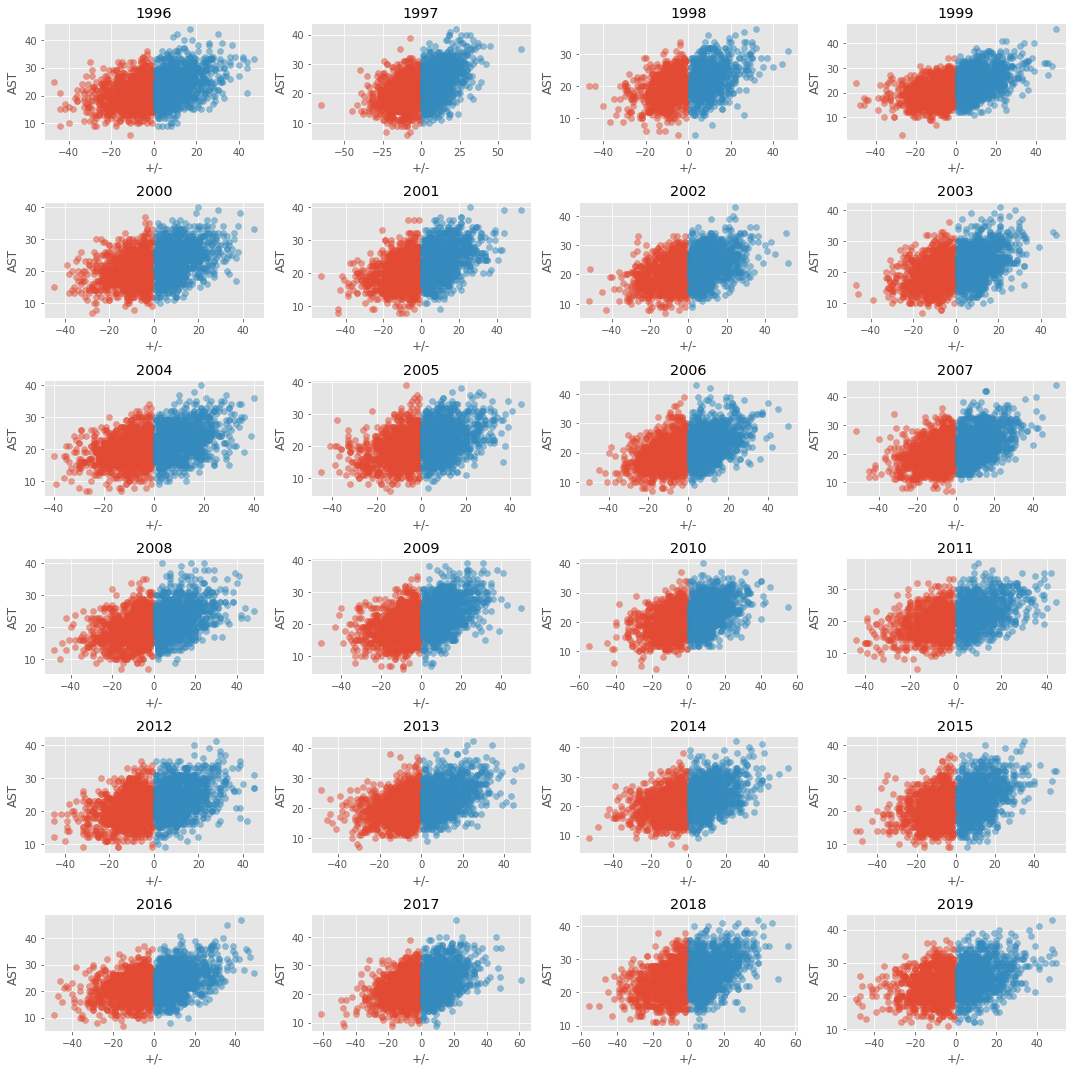

In [179]:
scatter_WL_subplots('+/-','AST')

In [111]:
def hist_win_lose(col, year_list, ax, bins):
    df = nba[nba['SEASON'].isin(year_list)]
    win = df[df['W/L'] == 'W']
    lose = df[df['W/L'] == 'L']
    
    ax.hist(lose[col], label = 'Lose',alpha=0.5,bins=bins)
    ax.hist(win[col],label = 'Win',alpha=0.5,bins=bins)
    
    ax.set_xlabel(col)
    ax.set_title(', '.join(map(str,year_list)))
    

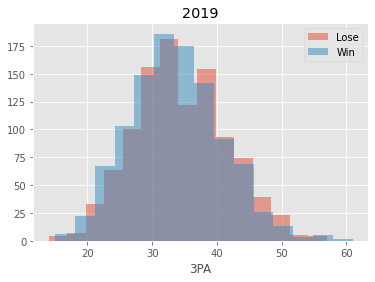

In [154]:
fig, ax = plt.subplots()
hist_win_lose('3PA',[2019],ax,15)
ax.legend()

In [155]:
def hist_WL_subplots(col,bins):
    years = list(range(1996,2020))
    fig, ax = plt.subplots(6,4,figsize=(15,15))
    for i,year in enumerate(years):
        hist_win_lose(col,[year],ax[i//4][i%4],bins)
        ax[i//4][i%4].set_ylabel('Frequency')
    fig.tight_layout()

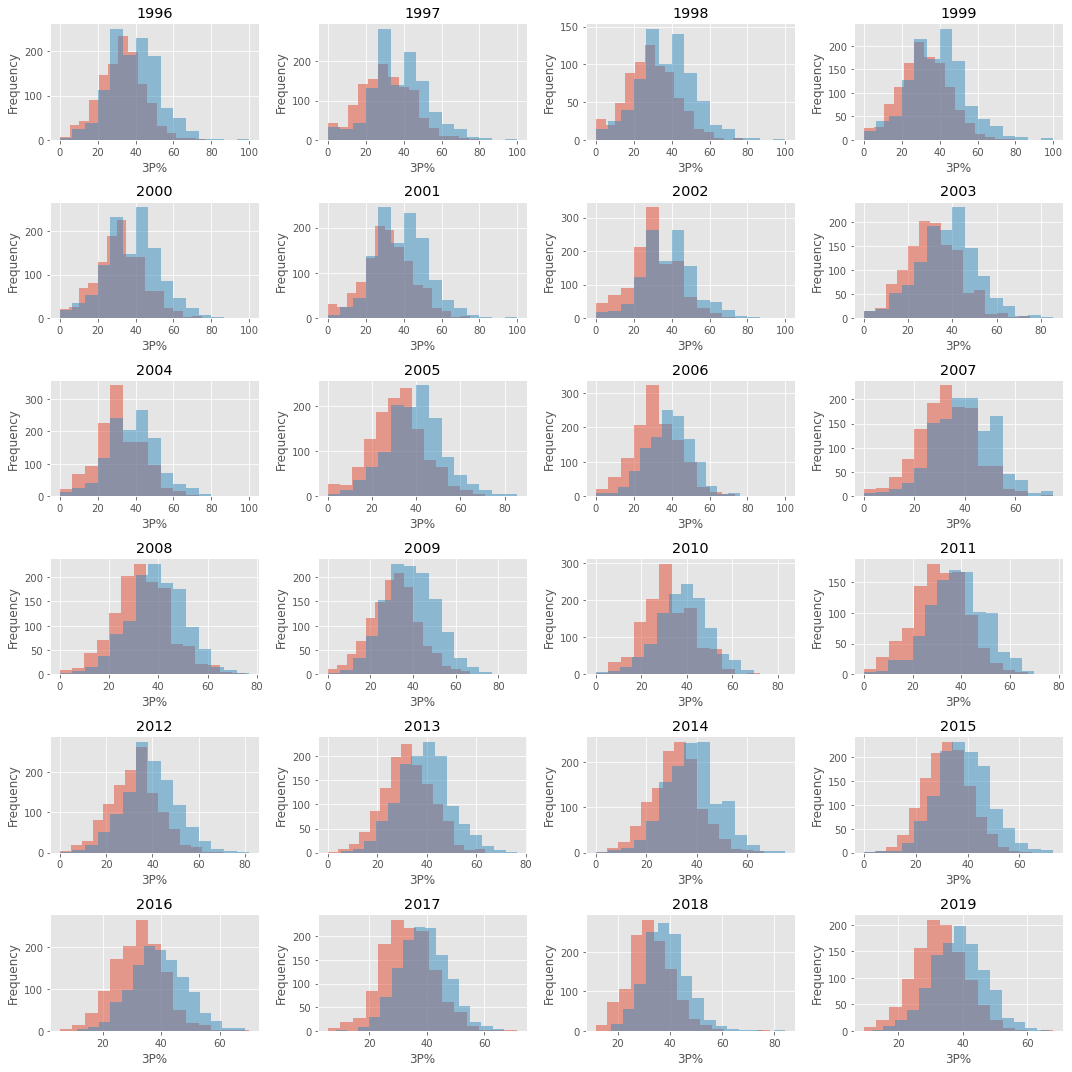

In [226]:
hist_WL_subplots('3P%',15)

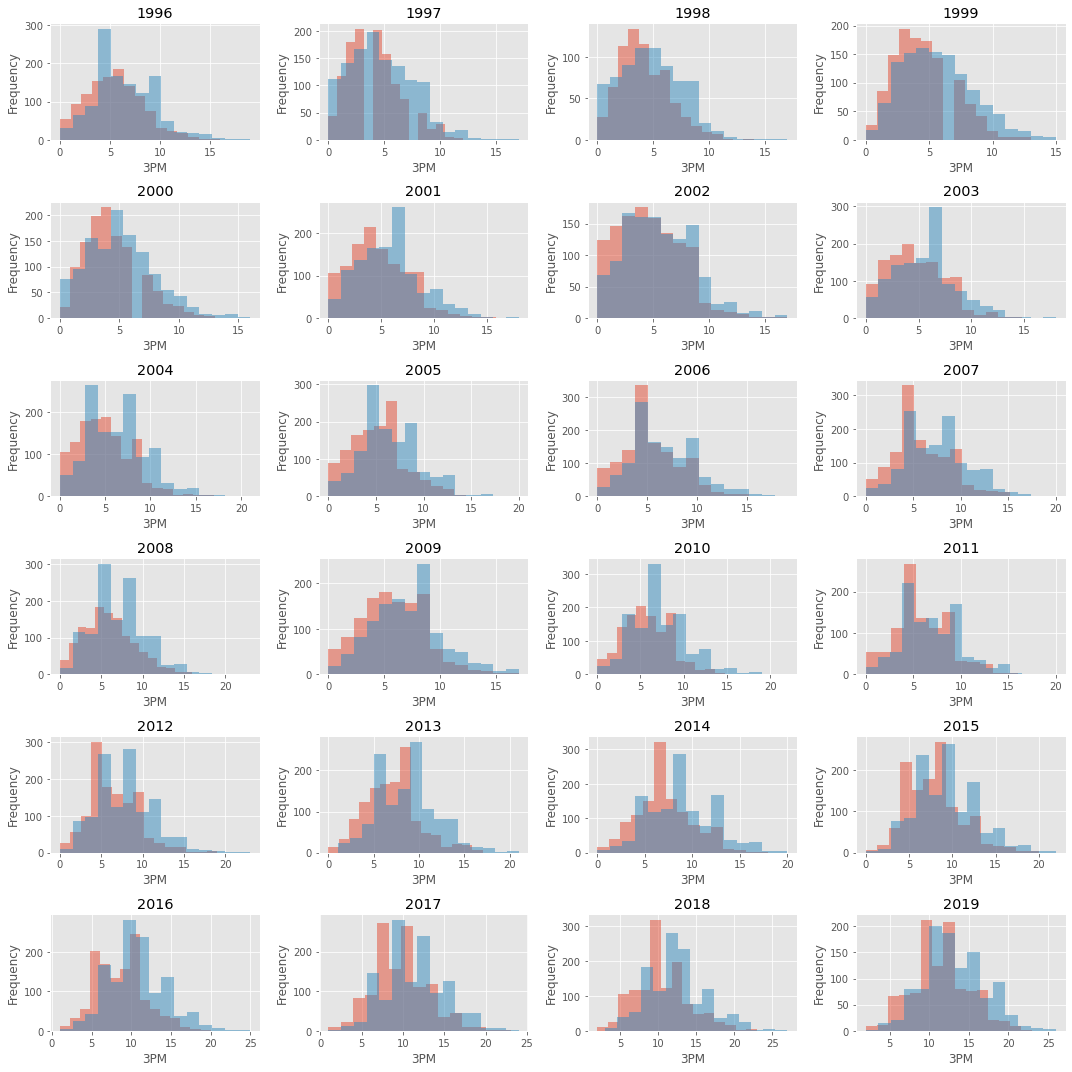

In [157]:
hist_WL_subplots('3PM',bins=15)

In [183]:
avgs = nba.groupby(['SEASON']).mean().reset_index()

In [184]:
avgs

,SEASON,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
0,1996,48.374264,96.899075,36.069807,79.305719,45.597981,6.047939,16.796047,35.807948,18.711522,...,73.689655,12.665685,28.418839,41.084525,22.043734,15.666106,8.203953,4.908326,22.109336,0.0
1,1997,48.370059,95.571489,35.905383,79.703953,45.195837,4.394449,12.713625,33.975189,19.366274,...,73.725315,13.050042,28.496215,41.546257,22.029437,15.487805,8.383936,5.072330,22.404121,0.0
2,1998,48.365517,91.580690,34.171724,78.191034,43.842759,4.457241,13.157931,33.258138,18.780000,...,72.824828,12.584138,29.065517,41.649655,20.722759,15.324138,8.353793,4.962759,22.210345,0.0
3,1999,48.298570,97.472246,36.833894,82.094197,44.981455,4.841463,13.715307,35.024432,18.962994,...,75.156854,12.415896,30.503364,42.919260,22.338520,15.470143,7.934399,5.169470,23.300252,0.0
4,2000,48.403701,94.810345,35.687553,80.598823,44.417283,4.846089,13.707738,34.857569,18.589151,...,74.862069,11.992431,30.474769,42.467199,21.777544,15.048360,7.821699,5.258621,22.348192,0.0
5,2001,48.332212,95.476451,36.169470,81.271236,44.618503,5.215307,14.749369,35.156686,17.922204,...,75.222498,12.234651,30.165685,42.400336,21.922204,14.460471,7.794365,5.224558,21.235071,0.0
6,2002,48.394449,95.080740,35.717830,80.785955,44.309125,5.130362,14.681665,34.353070,18.514718,...,75.824222,12.049622,30.256518,42.306140,21.502523,14.916316,7.941127,5.015980,21.753574,0.0
7,2003,48.340622,93.397813,35.010513,79.816232,43.940454,5.181665,14.925568,34.302103,18.195122,...,75.218966,12.091253,30.112700,42.203953,21.302775,14.975189,7.931876,5.055509,21.449117,0.0
8,2004,48.373984,97.198780,35.949187,80.335772,44.859350,5.600407,15.751220,35.164065,19.700000,...,75.609228,12.009756,29.847967,41.857724,21.277236,14.502846,7.515854,4.863008,22.630488,0.0
9,2005,48.418699,97.008537,35.839837,78.989431,45.486667,5.726016,15.980894,35.474878,19.602846,...,74.420000,11.174797,29.781707,40.956504,20.614228,14.414228,7.167480,4.698780,22.758537,0.0


In [217]:
win = nba[nba['W/L']=='W']
lose = nba[nba['W/L']=='L']
w_avgs = win.groupby(['SEASON']).mean().reset_index()
l_avgs = lose.groupby(['SEASON']).mean().reset_index()

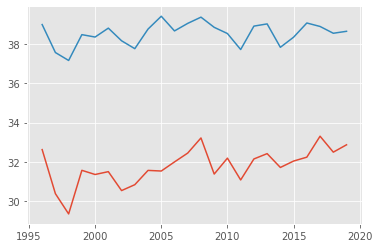

In [219]:
plt.plot(l_avgs['SEASON'],l_avgs['3P%'])
plt.plot(w_avgs['SEASON'],w_avgs['3P%'])


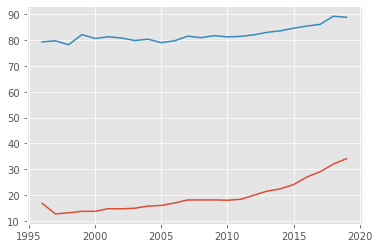

In [193]:
plt.plot(avgs['SEASON'],avgs['3PA'])
plt.plot(avgs['SEASON'],avgs['FGA'])

Text(0.5, 1.0, 'Increase in % of shots from 3\nDecrease in % of shots from 2')

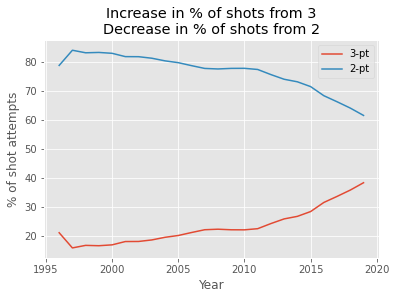

In [212]:
fig,ax = plt.subplots()
ax.plot(avgs['SEASON'],avgs['3PA']/avgs['FGA']*100,label='3-pt')
ax.plot(avgs['SEASON'],(avgs['FGA']-avgs['3PA'])/avgs['FGA']*100,label='2-pt')
ax.set_xlabel('Year')
ax.set_ylabel('% of shot attempts')
ax.legend()
ax.set_title('Increase in % of shots from 3\nDecrease in % of shots from 2')


Text(0.5, 1.0, 'Increase in 3pt attempts\nDecrease in 2pt attempts')

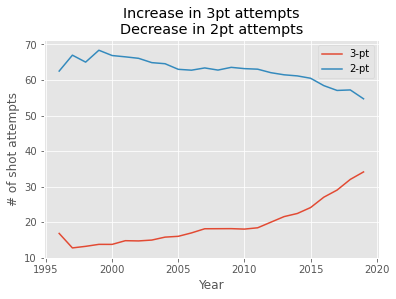

In [213]:
fig,ax = plt.subplots()
ax.plot(avgs['SEASON'],avgs['3PA'],label='3-pt')
ax.plot(avgs['SEASON'],(avgs['FGA']-avgs['3PA']),label='2-pt')
ax.set_xlabel('Year')
ax.set_ylabel('# of shot attempts')
ax.legend()
ax.set_title('Increase in 3pt attempts\nDecrease in 2pt attempts')


Text(0.5, 1.0, 'No Decrease in Points Scored from 2pt range')

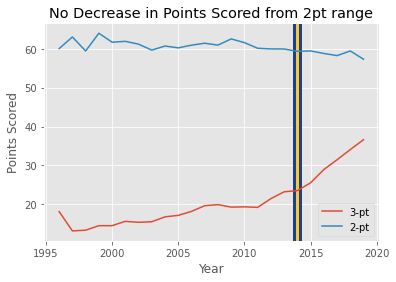

In [270]:
fig,ax = plt.subplots()
ax.axvline(2014,color='#1D428A',linewidth=9)
ax.axvline(2014,color='#FFC72C',linewidth=3)
ax.plot(avgs['SEASON'],avgs['3PM']*3,label='3-pt')
ax.plot(avgs['SEASON'],(avgs['FGM']-avgs['3PM'])*2,label='2-pt')
ax.set_xlabel('Year')
ax.set_ylabel('Points Scored')
ax.legend()
ax.set_title('No Decrease in Points Scored from 2pt range')

Text(0.5, 1.0, 'Increased Accuracy from 2pt Range\nIrradicating the midrange shot')

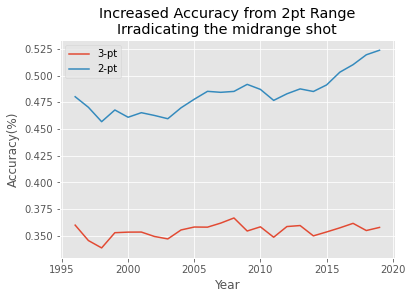

In [269]:
fig,ax = plt.subplots()
ax.plot(avgs['SEASON'],avgs['3PM']/avgs['3PA'],label='3-pt')
ax.plot(avgs['SEASON'],(avgs['FGM']-avgs['3PM'])/(avgs['FGA']-avgs['3PA']),label='2-pt')
ax.set_xlabel('Year')
ax.set_ylabel('Accuracy(%)')
ax.legend()
ax.set_title('Increased Accuracy from 2pt Range\nIrradicating the midrange shot')

In [223]:
stats.ttest_ind(win[win['SEASON']==2019]['3P%'],lose[lose['SEASON']==2019]['3P%'])

Ttest_indResult(statistic=16.524361277063104, pvalue=8.728606157230028e-58)

Text(0.5, 1.0, 'Difference in 3P% (Winners vs Losers)')

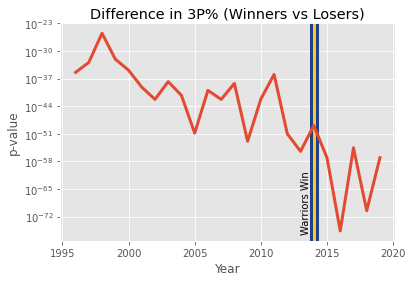

In [276]:
years = list(range(1996,2020))
ttests = []
for year in years:
    pval = stats.ttest_ind(win[win['SEASON']==year]['3P%'],lose[lose['SEASON']==year]['3P%'])[1]
    ttests.append(pval)
fig, ax = plt.subplots()
ax.axvline(2014,color='#1D428A',linewidth=9)
ax.axvline(2014,color='#FFC72C',linewidth=3)
ax.plot(years,ttests,linewidth=3)
plt.text(2013,10**(-76),'Warriors Win',rotation=90)
ax.set_yscale('log')
ax.set_xlabel('Year')
ax.set_ylabel('p-value')
ax.set_title('Difference in 3P% (Winners vs Losers)')


Text(0, 0.5, 'p-value')

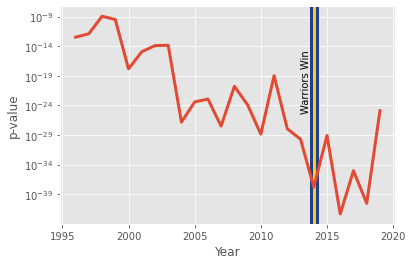

In [275]:
years = list(range(1996,2020))
ttests = []
for year in years:
    pval = stats.ttest_ind(win[win['SEASON']==year]['3PM'],lose[lose['SEASON']==year]['3PM'])[1]
    ttests.append(pval)
fig, ax = plt.subplots()
ax.axvline(2014,color='#1D428A',linewidth=9)
ax.axvline(2014,color='#FFC72C',linewidth=3)
ax.plot(years,ttests,linewidth=3)
plt.text(2013,10**(-25),'Warriors Win',rotation=90)
ax.set_yscale('log')
ax.set_xlabel('Year')
ax.set_ylabel('p-value')


Text(0.5, 0, 'Year')

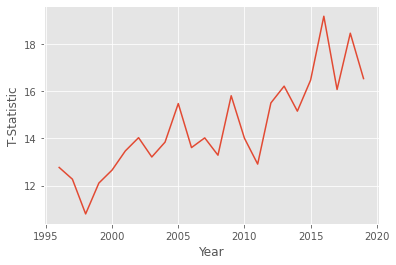

In [240]:
years = list(range(1996,2020))
ttests = []
for year in years:
    pval = stats.ttest_ind(win[win['SEASON']==year]['3P%'],lose[lose['SEASON']==year]['3P%'])[0]
    ttests.append(pval)
fig, ax = plt.subplots()
ax.plot(years,ttests)
ax.set_ylabel('T-Statistic')
ax.set_xlabel('Year')
